In [1]:
import pandas as pd
from datetime import datetime, date
from epiweeks import Week
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('dataset by week .csv')

In [3]:
df.rename(columns={'Admitted':'edvisits','av_daily_wind_max':'wind','av_daily_snow':'snow','av_daily_temp':'temp','CO':'co','PM10':'pm10','PM25':'pm25','NO2':'no2'}, inplace=True)

In [4]:
df['epiweek'] = df['epiweek'].apply(lambda x: Week.fromstring(str(x)))

In [5]:
df['date'] = df['epiweek'].apply(lambda x: Week.startdate(x))

In [6]:
df.rename(columns={'date':'weekstart'},inplace=True)

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.columns

Index(['epiweek', 'cases', 'edvisits', 'wind', 'precip', 'snow', 'temp', 'aqi',
       'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough', 'cold',
       'weekstart', 'year', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'weekstart'],
      dtype='object')

In [32]:
exog = [
        'edvisits'
        ,'wind'
        ,'precip'
        ,'snow'
        ,'temp'
        ,'aqi'
        ,'co'
        ,'Ozone'
        ,'pm10'
        ,'pm25'
        ,'no2'
        ,'flu'
        ,'cough'
        ,'cold'
        ,'month_1'
        ,'month_2'
        ,'month_3'
        ,'month_4'
        ,'month_5'
        #,'month_6'
        #,'month_7'
        #,'month_8'
        ,'month_9'
        ,'month_10'
        ,'month_11'
        ,'month_12'
        ]



y = df['cases']
x = sm.add_constant(pd.DataFrame([df[x].fillna(df[x].median()) for x in exog]).T)

mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     63.05
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.52e-176
Time:                        21:42:11   Log-Likelihood:                -7938.6
No. Observations:                1023   AIC:                         1.593e+04
Df Residuals:                     999   BIC:                         1.604e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        842.3513    232.322      3.626      0.0

In [35]:
df = pd.DataFrame([df[x].fillna(df[x].median()) for x in exog]).T

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

In [36]:
grangercausalitytests(df[['edvisits','cough']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.2232 , p=0.0008  , df_denom=1019, df_num=1
ssr based chi2 test:   chi2=11.2563 , p=0.0008  , df=1
likelihood ratio test: chi2=11.1947 , p=0.0008  , df=1
parameter F test:         F=11.2232 , p=0.0008  , df_denom=1019, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.5036 , p=0.0000  , df_denom=1016, df_num=2
ssr based chi2 test:   chi2=29.1499 , p=0.0000  , df=2
likelihood ratio test: chi2=28.7416 , p=0.0000  , df=2
parameter F test:         F=14.5036 , p=0.0000  , df_denom=1016, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.0460 , p=0.0000  , df_denom=1013, df_num=3
ssr based chi2 test:   chi2=33.3670 , p=0.0000  , df=3
likelihood ratio test: chi2=32.8328 , p=0.0000  , df=3
parameter F test:         F=11.0460 , p=0.0000  , df_denom=1013, df_num=3


{1: ({'ssr_ftest': (11.223234807267126, 0.0008374189968336978, 1019.0, 1),
   'ssr_chi2test': (11.256276715433762, 0.0007935422276568604, 1),
   'lrtest': (11.194740001868922, 0.0008202953070269031, 1),
   'params_ftest': (11.223234807267094, 0.0008374189968336978, 1019.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (14.503585361634194, 6.157638717841113e-07, 1016.0, 2),
   'ssr_chi2test': (29.149922547693922, 4.67923379313915e-07, 2),
   'lrtest': (28.741556534718256, 5.739185972283499e-07, 2),
   'params_ftest': (14.503585361633512, 6.15763871784538e-07, 1016.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (11.045999422193427, 3.8666686074226683e-07, 1013.0, 3),
   'ssr_chi2test': (33.36698739576692, 2.694788635956202e-07, 3),
   'lrtest': (32.832842407080534, 3.4930375432228264e-07, 3),
   'params_ftest': (11.045999422192855, 3.8666686074259786e-07, 1013.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.

In [37]:
from statsmodels.tsa.seasonal import STL

In [39]:
df = pd.read_csv("dataset by week (no outliers, median-filled) .csv")

Figure(640x480)


weekstart
2004-01-04    1.0
2004-01-11    1.0
2004-01-18    1.0
2004-01-25    1.0
2004-02-01    1.0
             ... 
2019-11-17    1.0
2019-11-24    1.0
2019-12-01    1.0
2019-12-08    1.0
2019-12-15    1.0
Name: robust_weight, Length: 768, dtype: float64

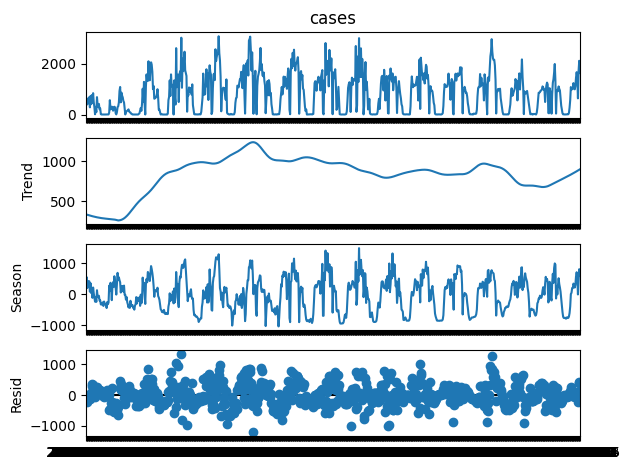

In [40]:
res = STL(df.set_index('weekstart')['cases'], period=52).fit()
print(res.plot())
res.weights

In [41]:
import plotly.express as px

In [42]:
px.box(df['cases'])

In [43]:
px.line(df.set_index('weekstart')['cases'])

In [45]:
res = STL(dd.set_index('weekstart')['cases'], period=52).fit()
print(res.plot())

NameError: name 'dd' is not defined

Figure(640x480)


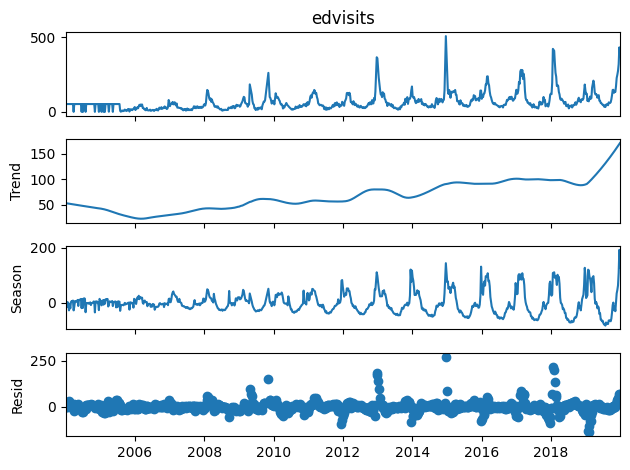

In [ ]:
res = STL(dd.set_index('weekstart')['edvisits'], period=52).fit()
print(res.plot())

In [46]:
exog = [
        'edvisits'
        ,'wind'
        ,'precip'
        ,'snow'
        ,'temp'
        ,'aqi'
        ,'co'
        ,'Ozone'
        ,'pm10'
        ,'pm25'
        ,'no2'
        ,'flu'
        ,'cough'
        ,'cold'
        ,'month_1'
        ,'month_2'
        ,'month_3'
        ,'month_4'
        ,'month_5'
        #,'month_6'
        #,'month_7'
        #,'month_8'
        ,'month_9'
        ,'month_10'
        ,'month_11'
        ,'month_12'
        ]



y = df['cases']
x = sm.add_constant(df[exog])

mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     55.84
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          7.49e-145
Time:                        21:48:07   Log-Likelihood:                -5771.7
No. Observations:                 768   AIC:                         1.159e+04
Df Residuals:                     744   BIC:                         1.170e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        391.4624    226.391      1.729      0.0

In [49]:
grangercausalitytests(df[['cases','cough']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.3961 , p=0.0003  , df_denom=764, df_num=1
ssr based chi2 test:   chi2=13.4487 , p=0.0002  , df=1
likelihood ratio test: chi2=13.3322 , p=0.0003  , df=1
parameter F test:         F=13.3961 , p=0.0003  , df_denom=764, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.4175  , p=0.0017  , df_denom=761, df_num=2
ssr based chi2 test:   chi2=12.9193 , p=0.0016  , df=2
likelihood ratio test: chi2=12.8115 , p=0.0017  , df=2
parameter F test:         F=6.4175  , p=0.0017  , df_denom=761, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7315  , p=0.0111  , df_denom=758, df_num=3
ssr based chi2 test:   chi2=11.2979 , p=0.0102  , df=3
likelihood ratio test: chi2=11.2153 , p=0.0106  , df=3
parameter F test:         F=3.7315  , p=0.0111  , df_denom=758, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2007  , p=0.0023  

{1: ({'ssr_ftest': (13.396138155389483, 0.00026948988307388434, 764.0, 1),
   'ssr_chi2test': (13.448740792125305, 0.0002451706807248907, 1),
   'lrtest': (13.332194645377967, 0.0002608880060908044, 1),
   'params_ftest': (13.396138155382504, 0.00026948988307488105, 764.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.417462537321014, 0.0017225571019863144, 761.0, 2),
   'ssr_chi2test': (12.919254411531924, 0.0015653791659601271, 2),
   'lrtest': (12.811516899382696, 0.0016520167748103564, 2),
   'params_ftest': (6.417462537321152, 0.001722557101986016, 761.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.7315158373684727, 0.011094343768742486, 758.0, 3),
   'ssr_chi2test': (11.297927238470509, 0.010219278710008634, 3),
   'lrtest': (11.215312739934234, 0.0106167918716796, 3),
   'params_ftest': (3.731515837368479, 0.011094343768741697, 758.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 

In [50]:
px.line(df.set_index('weekstart').loc[df.set_index('weekstart')['flu']<1823][['cases','flu']])

In [ ]:
px.box(dd.set_index('weekstart').loc[dd.set_index('weekstart')['flu']<1823]['flu'])

In [ ]:
dd = dd.set_index('weekstart').loc[dd.set_index('weekstart')['flu']<1823]

In [ ]:
dd.to_csv('dataset by week (no outliers, median-filled) .csv')

In [ ]:
dd.reset_index(inplace=True)

In [ ]:
exog = [
        'edvisits'
        ,'wind'
        ,'precip'
        ,'snow'
        ,'temp'
        ,'aqi'
        ,'co'
        ,'Ozone'
        ,'pm10'
        ,'pm25'
        ,'no2'
        ,'flu'
        ,'cough'
        ,'cold'
        ,'month_1'
        ,'month_2'
        ,'month_3'
        ,'month_4'
        ,'month_5'
        #,'month_6'
        #,'month_7'
        #,'month_8'
        ,'month_9'
        ,'month_10'
        ,'month_11'
        ,'month_12'
        ]
y = dd['cases']
x = sm.add_constant(dd[exog])

mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     55.84
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          7.49e-145
Time:                        10:32:29   Log-Likelihood:                -5771.7
No. Observations:                 768   AIC:                         1.159e+04
Df Residuals:                     744   BIC:                         1.170e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        391.4624    226.391      1.729      0.0

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
dd.columns

Index(['weekstart', 'epiweek', 'cases', 'edvisits', 'wind', 'precip', 'snow',
       'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough',
       'cold', 'year', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [ ]:
dd = dd[['weekstart', 'epiweek', 'cases', 'edvisits', 'wind', 'precip', 'snow',
       'temp', 'aqi', 'co', 'Ozone', 'pm10', 'pm25', 'no2', 'flu', 'cough',
       'cold', 'year',]]

In [ ]:
dd

,weekstart,epiweek,cases,edvisits,wind,precip,snow,temp,aqi,co,Ozone,pm10,pm25,no2,flu,cough,cold,year
0,2004-01-04,200401,599,53.0,11.0,0.11,1.80,17.0,41.0,6.0,0.0,3.0,35.0,28.0,880.0,372.0,3882.0,2004
1,2004-01-11,200402,640,53.0,12.0,0.07,0.72,23.0,56.0,5.0,0.0,3.0,52.0,25.0,709.0,331.0,3791.0,2004
2,2004-01-18,200403,399,53.0,11.0,0.04,0.50,15.0,41.0,6.0,0.0,1.0,31.0,31.0,686.0,289.0,3744.0,2004
3,2004-01-25,200404,622,53.0,12.0,0.10,1.23,13.0,37.0,6.0,0.0,1.0,27.0,33.0,1218.0,302.0,3659.0,2004
4,2004-02-01,200405,552,53.0,11.0,0.07,0.69,21.0,62.0,10.0,0.0,2.0,59.0,40.0,1141.0,300.0,3096.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2019-11-17,201947,1466,172.0,8.0,0.06,0.00,36.0,34.0,6.0,16.0,4.0,25.0,18.0,1338.0,1183.0,3976.0,2019
764,2019-11-24,201948,638,227.0,11.0,0.23,0.00,38.0,32.0,7.0,20.0,1.0,29.0,18.0,1195.0,1143.0,3752.0,2019
765,2019-12-01,201949,1722,248.0,9.0,0.13,0.64,33.0,26.0,8.0,24.0,0.0,24.0,18.0,1291.0,1168.0,4079.0,2019
766,2019-12-08,201950,2121,274.0,11.0,0.09,0.32,32.0,35.0,9.0,18.0,0.0,30.0,18.0,1416.0,1177.0,3881.0,2019


In [ ]:
exog = [
        'edvisits'
        ,'wind'
        ,'precip'
        ,'snow'
        ,'temp'
        ,'aqi'
        ,'co'
        ,'Ozone'
        ,'pm10'
        ,'pm25'
        ,'no2'
        ,'flu'
        ,'cough'
        ,'cold'
        ]
y = dd['cases']
x = sm.add_constant(dd[exog])

mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     37.46
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           7.85e-77
Time:                        17:56:39   Log-Likelihood:                -5953.9
No. Observations:                 768   AIC:                         1.194e+04
Df Residuals:                     753   BIC:                         1.201e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1320.7493    272.305      4.850      0.0

In [ ]:
grangercausalitytests(dd[['cases','edvisits']], maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=39.0694 , p=0.0000  , df_denom=764, df_num=1
ssr based chi2 test:   chi2=39.2229 , p=0.0000  , df=1
likelihood ratio test: chi2=38.2529 , p=0.0000  , df=1
parameter F test:         F=39.0694 , p=0.0000  , df_denom=764, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=13.4325 , p=0.0000  , df_denom=761, df_num=2
ssr based chi2 test:   chi2=27.0415 , p=0.0000  , df=2
likelihood ratio test: chi2=26.5752 , p=0.0000  , df=2
parameter F test:         F=13.4325 , p=0.0000  , df_denom=761, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.4658  , p=0.0001  , df_denom=758, df_num=3
ssr based chi2 test:   chi2=22.6042 , p=0.0000  , df=3
likelihood ratio test: chi2=22.2767 , p=0.0001  , df=3
parameter F test:         F=7.4658  , p=0.0001  , df_denom=758, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.9837  , p=0.0001  

{1: ({'ssr_ftest': (39.0694471531101, 6.795631548099602e-10, 764.0, 1),
   'ssr_chi2test': (39.22286121261184, 3.780872448036942e-10, 1),
   'lrtest': (38.25290214483175, 6.214458429657971e-10, 1),
   'params_ftest': (39.06944715303671, 6.79563154834289e-10, 764.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (13.432517023659198, 1.8490210882168977e-06, 761.0, 2),
   'ssr_chi2test': (27.041545440533366, 1.3427742877395403e-06, 2),
   'lrtest': (26.57517560453016, 1.6954068740251483e-06, 2),
   'params_ftest': (13.43251702365916, 1.84902108821697e-06, 761.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (7.46578109424684, 6.25576808291259e-05, 758.0, 3),
   'ssr_chi2test': (22.60417890672361, 4.882862002221302e-05, 3),
   'lrtest': (22.276661381096346, 5.713144235825173e-05, 3),
   'params_ftest': (7.465781094246865, 6.255768082912346e-05, 758.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
# testing for stationarity

t_stat, p_value, lags, _, critical_values, _ = adfuller(
    dd.set_index('weekstart')['cases'],
    autolag='AIC',
    maxlag=52
)

print(f'ADF Statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.2f}')
print(f'lags: {lags}')
for key, value in critical_values.items():
    print('Critial Values:')
    print(f'   {key}, {value:.2f}')


ADF Statistic: -2.64
p-value: 0.09
lags: 52
Critial Values:
   1%, -3.44
Critial Values:
   5%, -2.87
Critial Values:
   10%, -2.57


In [ ]:
def difference(dataset, n):
    # this function intakes a list of values, 
    # subtracts the nth prior value,
    # and returns the list of differenced values.
    return pd.Series([dataset[i] - dataset[i - n] for i in range(1, len(dataset))])

In [ ]:
# testing for stationarity

t_stat, p_value, lags, _, critical_values, _ = adfuller(
    difference(dd.set_index('weekstart')['cases'],1),
    autolag='AIC',
    maxlag=52
)

print(f'ADF Statistic: {t_stat:.2f}')
print(f'p-value: {p_value:.2f}')
print(f'lags: {lags}')
for key, value in critical_values.items():
    print('Critial Values:')
    print(f'   {key}, {value:.2f}')


ADF Statistic: -7.89
p-value: 0.00
lags: 52
Critial Values:
   1%, -3.44
Critial Values:
   5%, -2.87
Critial Values:
   10%, -2.57


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

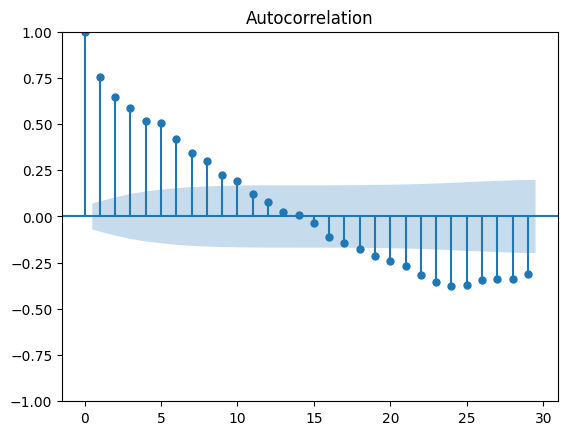

In [ ]:
plot = plot_acf(dd.set_index('weekstart')['cases'])

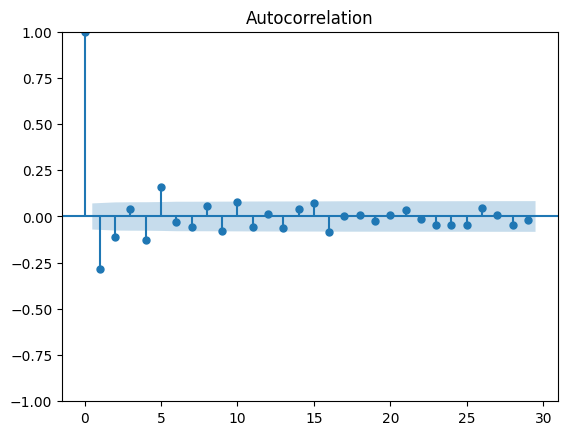

In [ ]:
plot = plot_acf(difference(dd.set_index('weekstart')['cases'],1))

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
statistic, pvalue, lags, critical_values = kpss(dd.set_index('weekstart')['cases'], nlags=52)

print(f'KPSS Test Statistic: {statistic:.2f}')
print(f'p-value: {pvalue:.2f}')
print(f'Lags: {lags}')
for key, value in critical_values.items():
    print('Critial Values:')
    print(f'   {key}, {value:.2f}')

KPSS Test Statistic: 0.28
p-value: 0.10
Lags: 52
Critial Values:
   10%, 0.35
Critial Values:
   5%, 0.46
Critial Values:
   2.5%, 0.57
Critial Values:
   1%, 0.74


C:\Users\ljens\AppData\Local\Temp\ipykernel_7232\812304827.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [53]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [65]:
df = pd.read_csv("dataset by week (median-filled) .csv")

In [66]:
df['weekstart'] = pd.to_datetime(df['weekstart'])

In [68]:
px.line(df['cases'])

In [84]:
dd = df.set_index('weekstart')

In [90]:
dd = dd.resample('W').first() # this fixes the index frequency issue

In [91]:
dd.index.freq

<Week: weekday=6>

In [93]:
exog

['edvisits',
 'wind',
 'precip',
 'snow',
 'temp',
 'aqi',
 'co',
 'Ozone',
 'pm10',
 'pm25',
 'no2',
 'flu',
 'cough',
 'cold',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

^^^ this work is picked back up in 'Analytics 6 .ipynb'